In [7]:
library(tidyverse)
library(GGally)
library(ggpubr)
library(reshape2)

In [10]:
getwd()
setwd("~/Documents/hack-n-lead-2019/")
getwd()

[1] "/Users/phd_projects/Documents"

[1] "/Users/phd_projects/Documents/hack-n-lead-2019"

In [12]:
large <- read_csv("data/large.csv")

Parsed with column specification:
cols(
  cif = col_double(),
  category = col_double(),
  turnover = col_double(),
  transaction_count = col_double(),
  io_ratio = col_double(),
  age = col_double(),
  nationality = col_double(),
  is_pep = col_double(),
  inactive_days_average = col_double(),
  inactive_days_max = col_double(),
  n_of_accounts = col_double(),
  distinct_counterparties = col_double(),
  channel_risk = col_double(),
  atm_withdrawal = col_double(),
  atm_deposit = col_double()
)



In [13]:
names(large)

[1] "cif"                     "category"               
 [3] "turnover"                "transaction_count"      
 [5] "io_ratio"                "age"                    
 [7] "nationality"             "is_pep"                 
 [9] "inactive_days_average"   "inactive_days_max"      
[11] "n_of_accounts"           "distinct_counterparties"
[13] "channel_risk"            "atm_withdrawal"         
[15] "atm_deposit"

In [14]:
large_loged = large  %>%
mutate(category = as.factor(category),
        is_pep = as.factor(is_pep)) %>%
  column_to_rownames(var = 'cif') %>%
 mutate(turnover_log = log10(1+turnover),
            atm_withdrawal_log10 = log10(1+atm_withdrawal),
          atm_deposit_log10 = log10(1+atm_deposit),
          transaction_count_log10 = log10(1+transaction_count),
        distinct_counterparties_log10 = log10(1+ distinct_counterparties),
        transaction_ave = turnover_log/transaction_count,
        inactive_days_average = log10(1+inactive_days_average),
        transaction_freq = 365/inactive_days_average,
       atm_withdrawal_norm = atm_withdrawal/turnover,
       atm_deposit_norm = atm_deposit/turnover) %>%
  mutate(atm_withdrawal_norm_log = log10(1+atm_withdrawal_norm),
         atm_deposit_norm_log = log10(1 + atm_deposit_norm)) 
#%>%
#select(-one_of(c('turnover','atm_withdrawal','atm_deposit','transaction_count', 'nationality',)))


In [15]:
large_loged_1 = large_loged %>%
    select(-one_of(c('turnover','atm_withdrawal','atm_deposit','transaction_count', 'nationality','atm_deposit_norm','atm_withdrawal_norm')))
names(large_loged)

[1] "category"                      "turnover"                     
 [3] "transaction_count"             "io_ratio"                     
 [5] "age"                           "nationality"                  
 [7] "is_pep"                        "inactive_days_average"        
 [9] "inactive_days_max"             "n_of_accounts"                
[11] "distinct_counterparties"       "channel_risk"                 
[13] "atm_withdrawal"                "atm_deposit"                  
[15] "turnover_log"                  "atm_withdrawal_log10"         
[17] "atm_deposit_log10"             "transaction_count_log10"      
[19] "distinct_counterparties_log10" "transaction_ave"              
[21] "transaction_freq"              "atm_withdrawal_norm"          
[23] "atm_deposit_norm"              "atm_withdrawal_norm_log"      
[25] "atm_deposit_norm_log"

Transform the data to plot the histograms:

In [16]:
large_loged_long = large_loged_1 %>%
    melt(id.vars = 'category')
names(large_loged_long)    

Warning message:
“attributes are not identical across measure variables; they will be dropped”


[1] "category" "variable" "value"

In [17]:
summary(large_loged_1$transaction_ave)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0043  0.1767  1.6534  2.2882  3.9741 11.1169     768 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2304 rows containing non-finite values (stat_bin).”


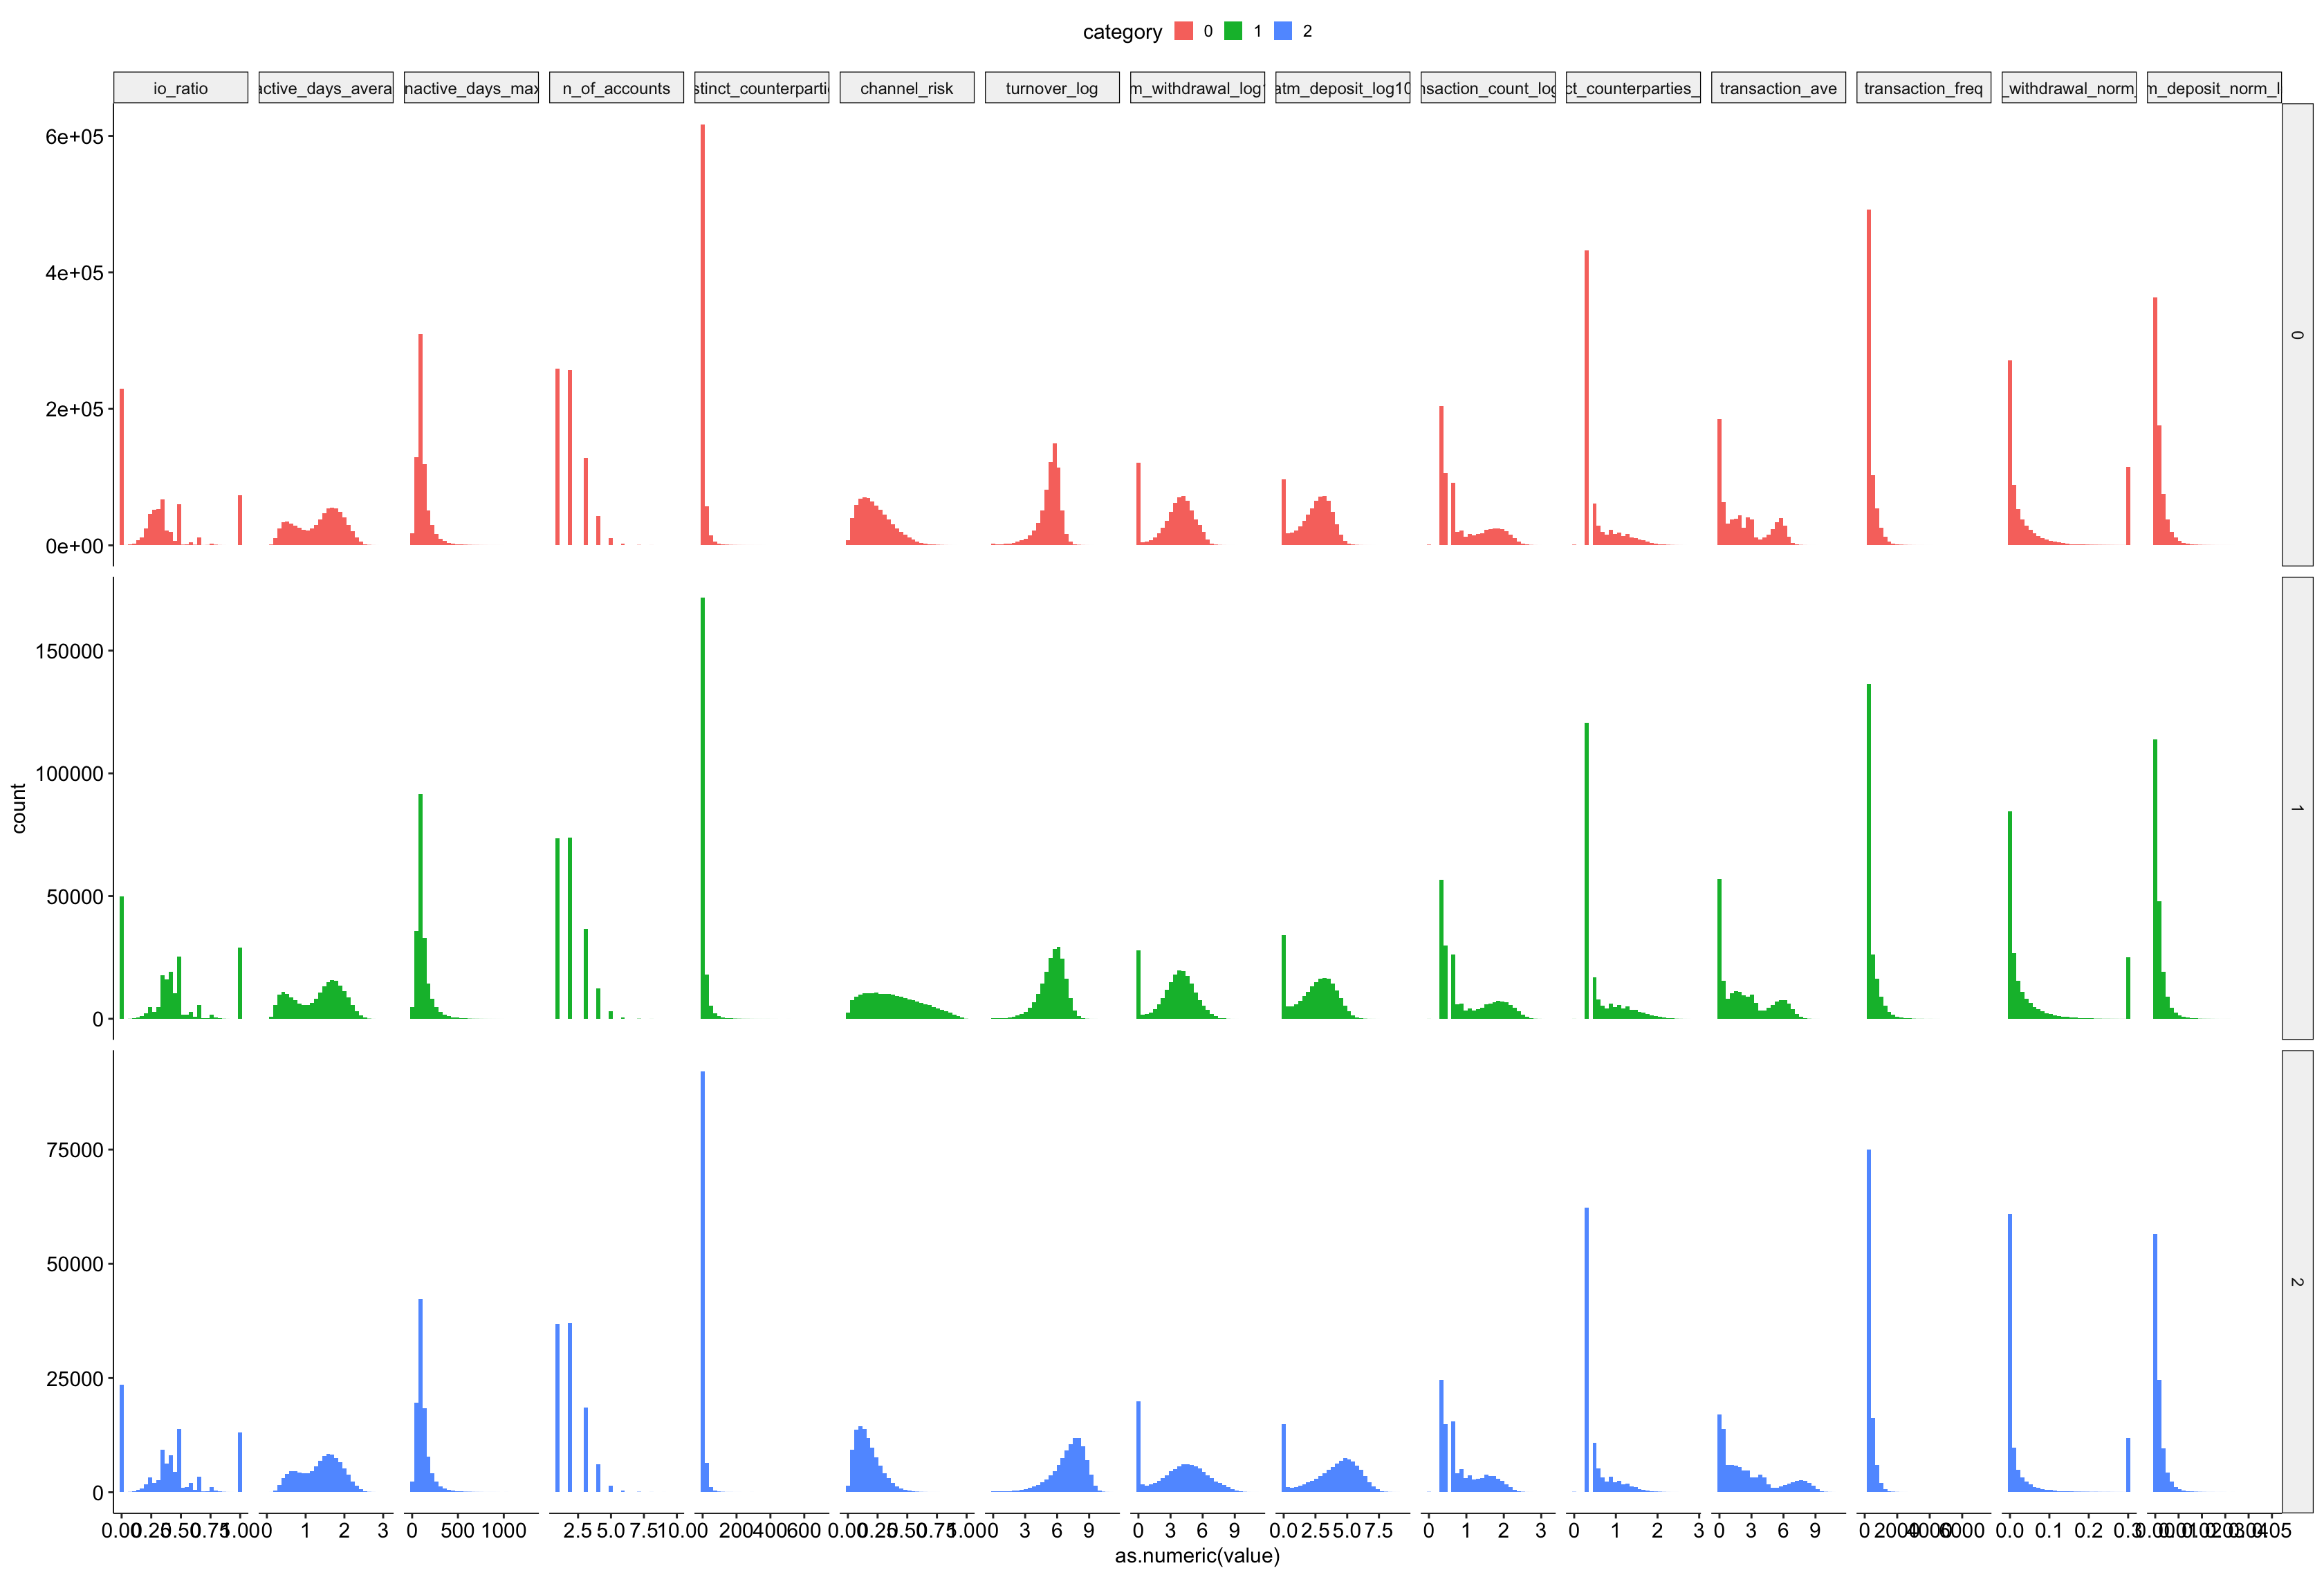

In [18]:
gg_histograms_big = ggplot(large_loged_long %>% filter(variable != 'age') %>% filter(variable != 'is_pep'), 
                             aes(x = as.numeric(value), fill = category))+
geom_histogram()+
facet_grid(category ~ variable, scales = 'free')+
theme_pubr(base_size = 18)
options(repr.plot.width = 28, repr.plot.height = 19)
gg_histograms_big

In [19]:
small <- read_csv("data/small.csv")

Parsed with column specification:
cols(
  cif = col_double(),
  category = col_double(),
  turnover = col_double(),
  transaction_count = col_double(),
  io_ratio = col_double(),
  age = col_double(),
  nationality = col_double(),
  is_pep = col_double(),
  inactive_days_average = col_double(),
  inactive_days_max = col_double(),
  n_of_accounts = col_double(),
  distinct_counterparties = col_double(),
  channel_risk = col_double(),
  atm_withdrawal = col_double(),
  atm_deposit = col_double()
)



In [20]:
large_loged_private_normal = large_loged_1 %>%
filter(category == 0) %>%
filter(is_pep == 0) %>%
select(-is_pep) %>%
select(-category)
gg_pairs_large_private = ggpairs(large_loged_private_normal, aes(alpha = 0.4))


In [21]:
options(repr.plot.width = 28, repr.plot.height = 28)
gg_pairs_large_private + theme_pubr(base_size = 18)+ggtitle('Normal people')

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 690 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 690 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 690 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 690 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 690 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 690 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 690 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "p

Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing missing values (geom_point).”
Warning message:
“Removed 690 rows containing non-finite values (stat_density).”


ERROR: Error: векторная память вышла (достигнут предел?)


plot without title

In [ ]:
large_loged_private_PEP = large_loged_1 %>%
filter(category == 0) %>%
filter(is_pep == 0) %>%
select(-is_pep) %>%
select(-category)
gg_pairs_large_PEP = ggpairs(large_loged_private_PEP, aes(alpha = 0.4))
options(repr.plot.width = 28, repr.plot.height = 28)
gg_pairs_large_PEP + theme_pubr(base_size = 18)+ggtitle('PEP people')

In [ ]:
large_loged_companies = large_loged_1 %>%
filter(category == 1) %>%
select(-is_pep) %>%
select(-category)
gg_pairs_large_companies = ggpairs(large_loged_companies, aes(alpha = 0.4))
options(repr.plot.width = 28, repr.plot.height = 28)
gg_pairs_large_companies + theme_pubr(base_size = 18)+ggtitle('Companies')

In [ ]:
large_loged_institutions = large_loged_1 %>%
filter(category == 1) %>%
select(-is_pep) %>%
select(-category)
gg_pairs_large_institutions = ggpairs(large_loged_institutions, aes(alpha = 0.4))
options(repr.plot.width = 28, repr.plot.height = 28)
gg_pairs_large_institutions + theme_pubr(base_size = 18)+ggtitle('Institutions')

In [ ]:
options(repr.plot.width = 28, repr.plot.height = 3)
gg_pairs + theme_pubr(base_size = 18)